In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import xmltodict
import urllib
import subprocess
from itertools import count
import os
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp

In [8]:
a1 = nx.read_graphml('testy/ID_A1.gml')

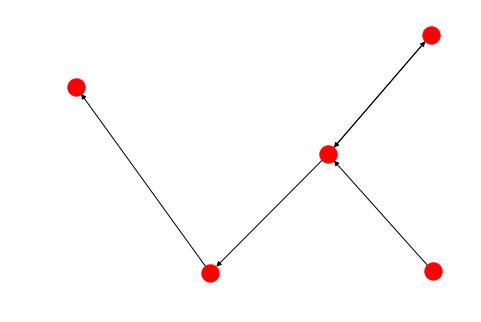

In [9]:
nx.draw(a1)

In [10]:
a2 = nx.read_graphml('testy/ID_A2.gml')

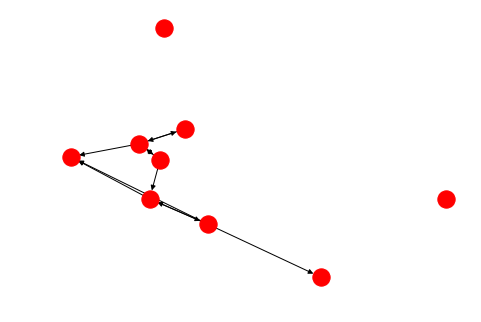

In [11]:
nx.draw(a2)

In [12]:
a1_2=nx.compose(a1,a2)

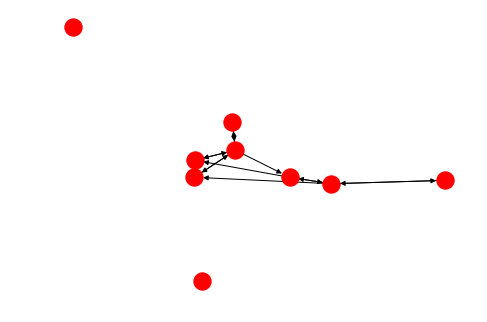

In [13]:
nx.draw(a1_2)

In [15]:
nx.draw_networkx_labels(a1_2)

TypeError: draw_networkx_labels() missing 1 required positional argument: 'pos'

In [95]:
def grab_wikitext(url):
    file = urllib.request.urlopen(url)
    data = file.read()
    file.close()
    try:
        data = xmltodict.parse(data)
        return data['mediawiki']['page']['revision']['text']['#text']
    except KeyError:
        return ''
    

In [77]:
indices = [i for i in range(1,88)]
base_url = 'https://en.wikipedia.org/wiki/Special:Export/Talk:Intelligent_design/Archive_'

In [30]:
d = grab_wikidata("%s%s" % (base_url,1))

In [84]:
graphs = []
for i in indices:
    print("on %d" % i) 
    wikitext = grab_wikitext("%s%s" % (base_url, i))
    wtf = 'testy/idtalk/wikitext/Archive_%d.wtx' % i
    f = open(wtf, 'w', encoding='utf-8')
    f.write(wikitext)
    f.close()
    gmlf = 'testy/idtalk/gml/Archive_%d.gml' % i
    parse_command = 'C:/Users/joe/Documents/projects/wiki/grawitas_cli_x86/grawitas_cli_x86/grawitas_cli_core.exe --input-talk-page-file %s  --comment-network-graphml %s' % (wtf, gmlf)
    subprocess.run(parse_command)
    try:
        graph = nx.read_graphml(gmlf)
        graphs.append(graph)
    except:
        print("failed on Archive %d" % i)
    

on 1
on 2
on 3
on 4
on 5
on 6
on 7
on 8
on 9
on 10
on 11
on 12
on 13
on 14
on 15
on 16
on 17
on 18
on 19
on 20
on 21
on 22
on 23
on 24
on 25
on 26
on 27
on 28
on 29
on 30
on 31
on 32
on 33
on 34
on 35
on 36
on 37
on 38
on 39
on 40
on 41
on 42
on 43
on 44
on 45
on 46
on 47
on 48
on 49
on 50
on 51
on 52
on 53
on 54
on 55
on 56
on 57
on 58
on 59
on 60
on 61
on 62
on 63
on 64
on 65
on 66
on 67
on 68
on 69
on 70
on 71
on 72
on 73
on 74
on 75
on 76
on 77
on 78
on 79
on 80
on 81
on 82
on 83
on 84
on 85
on 86
on 87


In [42]:
subprocess.run('C:/Users/joe/Documents/projects/wiki/grawitas_cli_x86/grawitas_cli_x86/grawitas_cli_core.exe')

CompletedProcess(args='C:/Users/joe/Documents/projects/wiki/grawitas_cli_x86/grawitas_cli_x86/grawitas_cli_core.exe', returncode=1)

In [45]:
d = grab_wikitext("%s%s" % (base_url,1))

In [47]:
o = open('testy/test.wtx', 'w')

In [48]:
o.write(d)

28707

In [49]:
o.close()

In [52]:
subprocess.run('C:/Users/joe/Documents/projects/wiki/grawitas_cli_x86/grawitas_cli_x86/grawitas_cli_core.exe --input-talk-page-file testy/test.wtx  --comment-network-graphml testy/test.gml')

CompletedProcess(args='C:/Users/joe/Documents/projects/wiki/grawitas_cli_x86/grawitas_cli_x86/grawitas_cli_core.exe --input-talk-page-file testy/test.wtx  --comment-network-graphml testy/test.gml', returncode=0)

KeyError: 1

In [85]:
archive_graph = nx.DiGraph()
for graph in graphs:
    archive_graph = nx.compose(archive_graph, graph)

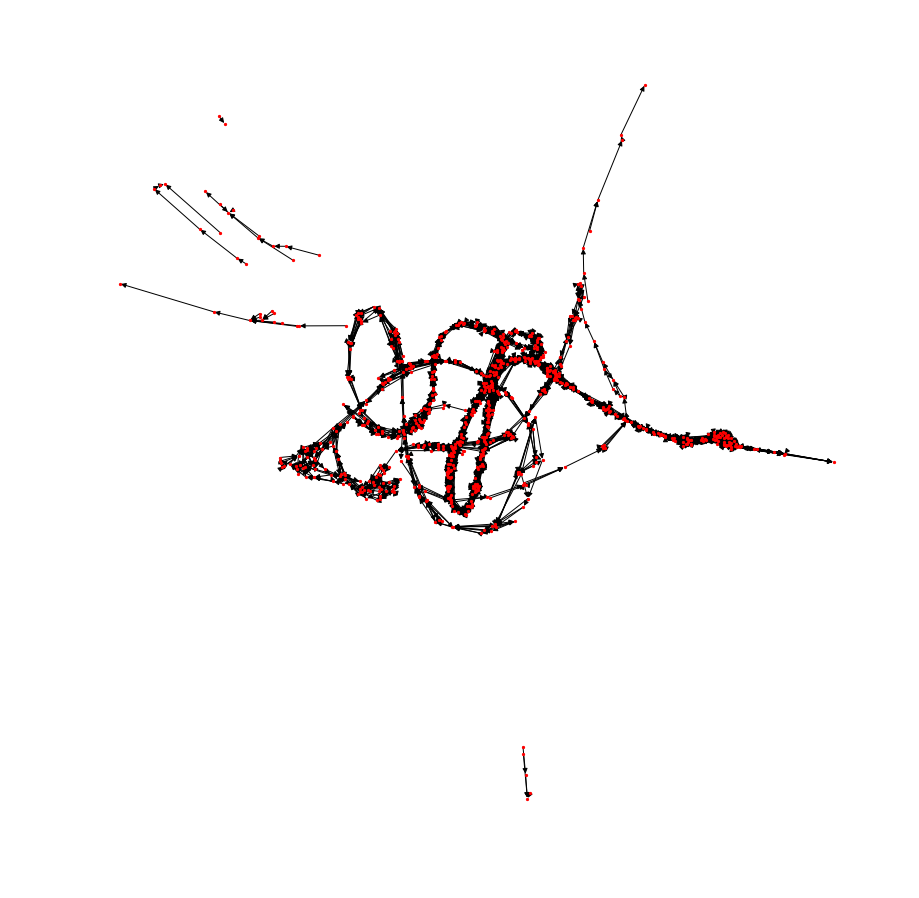

In [93]:
plt.figure(figsize=(12, 12))
nx.draw(archive_graph, node_size=5, edge_size=.1,pos=nx.spring_layout(archive_graph))

In [88]:
len(archive_graph.nodes)

791

In [94]:
grab_wikitext('https://en.wikipedia.org/wiki/Special:Export/Wikipedia_talk:Requests_for_arbitration/Orthogonal')

KeyError: 'page'

In [98]:
import pickle
aturls = pickle.load(open('testy/arbtalk/casetalkurls.data', 'rb'))

In [99]:
aturls

['Wikipedia_talk:Requests_for_arbitration/VeryVerily',
 'Wikipedia_talk:Requests_for_arbitration/Turrican_and_VeryVerily',
 'Wikipedia_talk:Requests_for_arbitration/Shorne_and_Fred_Bauder',
 'Wikipedia_talk:Requests_for_arbitration/Gzornenplatz,_Kevin_Baas,_Shorne,_VeryVerily',
 'Wikipedia_talk:Requests_for_arbitration/Arminius',
 'Wikipedia_talk:Requests_for_arbitration/Reithy',
 'Wikipedia_talk:Requests_for_arbitration/Cantus_vs._Guanaco',
 'Wikipedia_talk:Requests_for_arbitration/Irismeister_3',
 'Wikipedia_talk:Requests_for_arbitration/Avala',
 'Wikipedia_talk:Requests_for_arbitration/Rex071404_2',
 'Wikipedia_talk:Requests_for_arbitration/Lance6wins',
 'Wikipedia_talk:Requests_for_arbitration/Rex071404',
 'Wikipedia_talk:Requests_for_arbitration/Jimmyvanthach',
 'Wikipedia_talk:Requests_for_arbitration/RickK_vs._Guanaco',
 'Wikipedia_talk:Requests_for_arbitration/RK',
 'Wikipedia_talk:Requests_for_arbitration/Orthogonal',
 'Wikipedia_talk:Requests_for_arbitration/JRR_Trollkien',
 

In [100]:
[url.split('/')[-1] for url in aturls]

['VeryVerily',
 'Turrican_and_VeryVerily',
 'Shorne_and_Fred_Bauder',
 'Gzornenplatz,_Kevin_Baas,_Shorne,_VeryVerily',
 'Arminius',
 'Reithy',
 'Cantus_vs._Guanaco',
 'Irismeister_3',
 'Avala',
 'Rex071404_2',
 'Lance6wins',
 'Rex071404',
 'Jimmyvanthach',
 'RickK_vs._Guanaco',
 'RK',
 'Orthogonal',
 'JRR_Trollkien',
 'Kenneth_Alan',
 'K1',
 'ChrisO_and_Levzur',
 'User:PolishPoliticians',
 'Lyndon_LaRouche',
 'User:Guanaco_versus_User:Lir',
 'Mr-Natural-Health',
 'Lir',
 'Cantus',
 'Mav_v._168',
 'Irismeister_2',
 'Wik2',
 'Paul_Vogel',
 'Anthony_DiPierro',
 'Irismeister',
 'Wik',
 'Plautus_satire_vs_Raul654',
 'Theresa_knott_vs._Mr-Natural-Health',
 'Wilkes,_Wyss_and_Onefortyone',
 'Nobs01_and_others',
 'Ultramarine',
 'FuelWagon_v._Ed_Poor',
 'Climate_change_dispute_2',
 'Regarding_Ted_Kennedy',
 'Rangerdude',
 'Pigsonthewing',
 'Rex071404_4',
 'Instantnood_2',
 'Silverback',
 'Maoririder',
 'Lightbringer',
 'Stevertigo',
 'Polygamy',
 'REX',
 'Louis_Epstein',
 'Zephram_Stark',
 'jgu

In [122]:
arb_graphs = []
a_base_url = base_url = 'https://en.wikipedia.org/wiki/Special:Export/'
i = 1
for url in aturls:
    name = url.split('/')[-1]
    print("(%d) %s" % (i,url))
    #wikitext = grab_wikitext("%s%s" % (a_base_url, url))
    #wtf = 'testy/arbtalk/wikitext/case_%d.wtx' % i
    #f = open(wtf, 'w', encoding='utf-8')
    #f.write(wikitext)
    #f.close()
    gmlf = 'testy/arbtalk/gml/case_%d.gml' % i
    #parse_command = 'C:/Users/joe/Documents/projects/wiki/grawitas_cli_x86/grawitas_cli_x86/grawitas_cli_core.exe --input-talk-page-file %s  --comment-network-graphml %s' % (wtf, gmlf)
    #subprocess.run(parse_command)
    try:
        graph = nx.read_graphml(gmlf)
        for node in graph.nodes:
            graph.nodes[node]['case'] = case
        arb_graphs.append(graph)
    except:
        print("failed on Archive %d" % i)
    i += 1
    

(1) Wikipedia_talk:Requests_for_arbitration/VeryVerily
failed on Archive 1
(2) Wikipedia_talk:Requests_for_arbitration/Turrican_and_VeryVerily
failed on Archive 2
(3) Wikipedia_talk:Requests_for_arbitration/Shorne_and_Fred_Bauder
failed on Archive 3
(4) Wikipedia_talk:Requests_for_arbitration/Gzornenplatz,_Kevin_Baas,_Shorne,_VeryVerily
failed on Archive 4
(5) Wikipedia_talk:Requests_for_arbitration/Arminius
failed on Archive 5
(6) Wikipedia_talk:Requests_for_arbitration/Reithy
failed on Archive 6
(7) Wikipedia_talk:Requests_for_arbitration/Cantus_vs._Guanaco
failed on Archive 7
(8) Wikipedia_talk:Requests_for_arbitration/Irismeister_3
(9) Wikipedia_talk:Requests_for_arbitration/Avala
(10) Wikipedia_talk:Requests_for_arbitration/Rex071404_2
(11) Wikipedia_talk:Requests_for_arbitration/Lance6wins
failed on Archive 11
(12) Wikipedia_talk:Requests_for_arbitration/Rex071404
failed on Archive 12
(13) Wikipedia_talk:Requests_for_arbitration/Jimmyvanthach
failed on Archive 13
(14) Wikipedia_t

failed on Archive 110
(111) Wikipedia_talk:Requests_for_arbitration/Xed
failed on Archive 111
(112) Wikipedia_talk:Requests_for_arbitration/JonGwynne
failed on Archive 112
(113) Wikipedia_talk:Requests_for_arbitration/CheeseDreams_2
failed on Archive 113
(114) Wikipedia_talk:Requests_for_arbitration/WikiUser
(115) Wikipedia_talk:Requests_for_arbitration/Robert_the_Bruce
failed on Archive 115
(116) Wikipedia_talk:Requests_for_arbitration/Lyndon_LaRouche_2
failed on Archive 116
(117) Wikipedia_talk:Requests_for_arbitration/Gzornenplatz
(118) Wikipedia_talk:Requests_for_arbitration/Chuck_F
failed on Archive 118
(119) Wikipedia_talk:Requests_for_arbitration/Charles_Darwin-Lincoln_dispute
failed on Archive 119
(120) Wikipedia_talk:Requests_for_arbitration/Antifinnugor
(121) Wikipedia_talk:Requests_for_arbitration/Rienzo
failed on Archive 121
(122) Wikipedia_talk:Requests_for_arbitration/Libertas
failed on Archive 122
(123) Wikipedia_talk:Requests_for_arbitration/172
failed on Archive 123
(1

failed on Archive 226
(227) Wikipedia_talk:Requests_for_arbitration/Anonimu
failed on Archive 227
(228) Wikipedia_talk:Requests_for_arbitration/Macedonia
failed on Archive 228
(229) Wikipedia_talk:Requests_for_arbitration/Asgardian-Tenebrae
failed on Archive 229
(230) Wikipedia_talk:Requests_for_arbitration/Durova
failed on Archive 230
(231) Wikipedia_talk:Requests_for_arbitration/Privatemusings
failed on Archive 231
(232) Wikipedia_talk:Requests_for_arbitration/Winter_Soldier_2
failed on Archive 232
(233) Wikipedia_talk:Requests_for_arbitration/Eyrian
failed on Archive 233
(234) Wikipedia_talk:Requests_for_arbitration/Ferrylodge
failed on Archive 234
(235) Wikipedia_talk:Requests_for_arbitration/Railpage_Australia
failed on Archive 235
(236) Wikipedia_talk:Requests_for_arbitration/Martinphi-ScienceApologist
failed on Archive 236
(237) Wikipedia_talk:Requests_for_arbitration/Sadi_Carnot
failed on Archive 237
(238) Wikipedia_talk:Requests_for_arbitration/Stefanomencarelli
failed on Arch

failed on Archive 323
(324) Wikipedia_talk:Arbitration/Requests/Case/Kww_and_The_Rambling_Man#Final_decision
failed on Archive 324
(325) Wikipedia_talk:Arbitration/Requests/Case/Lightbreather#Final_decision
failed on Archive 325
(326) Wikipedia_talk:Arbitration/Requests/Case/Technical_13#Motion
failed on Archive 326
(327) Wikipedia_talk:Arbitration/Requests/Case/Collect_and_others#Final_decision
failed on Archive 327
(328) Wikipedia_talk:Arbitration/Requests/Case/Christianity_and_Sexuality#Final_decision
failed on Archive 328
(329) Wikipedia_talk:Arbitration/Requests/Case/Wifione#Final_decision
failed on Archive 329
(330) Wikipedia_talk:Arbitration/Requests/Case/GamerGate
failed on Archive 330
(331) Wikipedia_talk:Arbitration/Requests/Case/The_Rambling_Man#Final_decision
failed on Archive 331
(332) Wikipedia_talk:Arbitration/Requests/Case/Gamaliel_and_others#Final_decision
failed on Archive 332
(333) Wikipedia_talk:Arbitration/Requests/Case/Wikicology#Final_decision
failed on Archive 3

In [109]:
arb_graph = nx.DiGraph()
for graph in arb_graphs:
    arb_graph = nx.compose(arb_graph, graph)

In [110]:
max([len(g.nodes) for g in arb_graphs])

1697

In [111]:
len(arb_graph.nodes)

1697

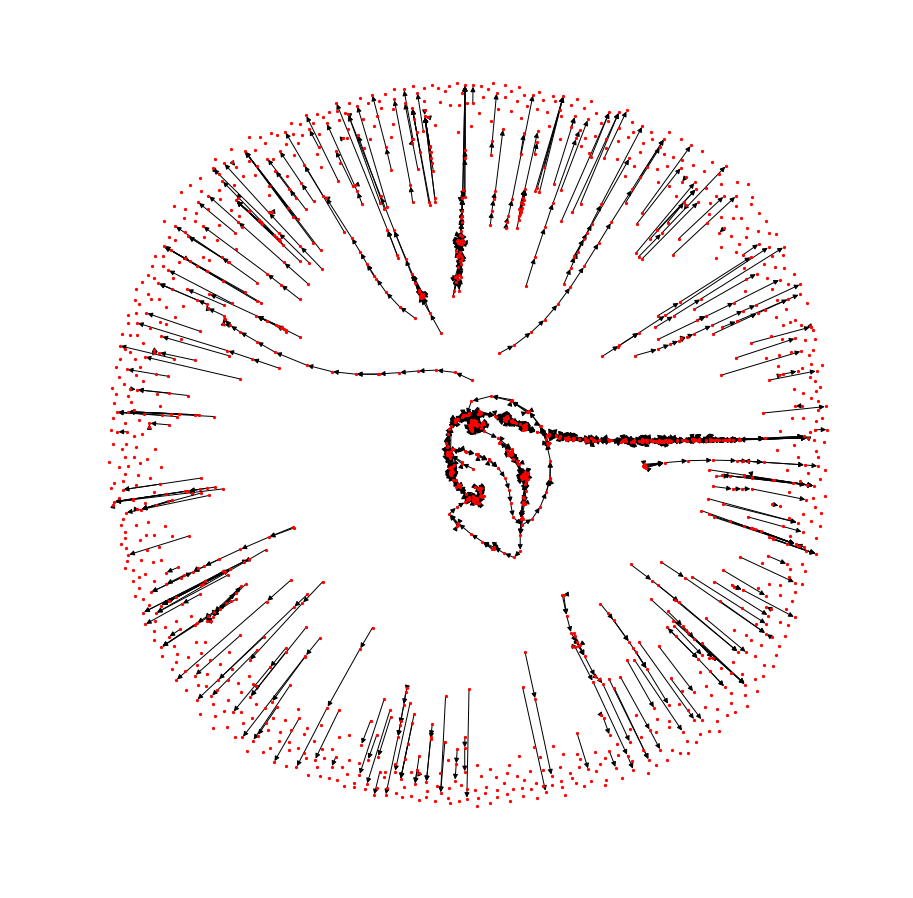

In [114]:
plt.figure(figsize=(12, 12))
nx.draw(arb_graph, node_size=5, edge_size=.1,pos=nx.spring_layout(arb_graph))

In [117]:
arb_graph.nodes['n0']['test'] = 'test'

In [121]:
for node in graph.nodes:
    print(graph.nodes[node])

{'date': '2017-11-21T20:29:00Z', 'text': "I think it is premature at this point to have a case. Salvidrim! tried to do the right thing, recognizes that he fucked up, and is attempting to mitigate it. I don't think there was misuse of tools that would require an immediate desysop. Let's just let this play out for a bit and see what happens.--", 'user': 'SarekOfVulcan'}
{'date': '2017-11-21T21:00:00Z', 'text': "{{re|TonyBallioni}} I know you didn't mention an emergency desysop. I'm just pointing out that since that isn't in play here, there's no reason not to wait a bit and see what Salvidrim! and the community come up with. --", 'user': 'SarekOfVulcan'}
{'date': '2017-11-30T14:27:00Z', 'text': '{{re|SMcCandlish}} Lovely wording. I strongly agree with {{diff|Wikipedia:Arbitration/Requests/Case|next|812449817|your points}}. --', 'user': 'SarekOfVulcan'}
{'date': '2017-11-21T21:15:00Z', 'text': 'Simply put, if we need to craft some kind of elaborate restriction for you so that you can rema

In [128]:
arb_graphs = []
a_base_url = base_url = 'https://en.wikipedia.org/wiki/Special:Export/'
i = 1
for url in aturls:
    name = url.split('/')[-1]
    print("(%d) %s" % (i,url))
    #wikitext = grab_wikitext("%s%s" % (a_base_url, url))
    #wtf = 'testy/arbtalk/wikitext/case_%d.wtx' % i
    #f = open(wtf, 'w', encoding='utf-8')
    #f.write(wikitext)
    #f.close()
    gmlf = 'testy/arbtalk/gml/case_%d.gml' % i
    #parse_command = 'C:/Users/joe/Documents/projects/wiki/grawitas_cli_x86/grawitas_cli_x86/grawitas_cli_core.exe --input-talk-page-file %s  --comment-network-graphml %s' % (wtf, gmlf)
    #subprocess.run(parse_command)
    graph = nx.read_graphml(gmlf)
    for node in graph.nodes:
        graph.nodes[node]['case'] = name
    for edge in graph.edges:
        graph.edges[edge]['case'] = name
    arb_graphs.append(graph)
    #except:
    #    print("failed on Archive %d" % i)
    i += 1
    

(1) Wikipedia_talk:Requests_for_arbitration/VeryVerily
(2) Wikipedia_talk:Requests_for_arbitration/Turrican_and_VeryVerily
(3) Wikipedia_talk:Requests_for_arbitration/Shorne_and_Fred_Bauder
(4) Wikipedia_talk:Requests_for_arbitration/Gzornenplatz,_Kevin_Baas,_Shorne,_VeryVerily
(5) Wikipedia_talk:Requests_for_arbitration/Arminius
(6) Wikipedia_talk:Requests_for_arbitration/Reithy
(7) Wikipedia_talk:Requests_for_arbitration/Cantus_vs._Guanaco
(8) Wikipedia_talk:Requests_for_arbitration/Irismeister_3
(9) Wikipedia_talk:Requests_for_arbitration/Avala
(10) Wikipedia_talk:Requests_for_arbitration/Rex071404_2
(11) Wikipedia_talk:Requests_for_arbitration/Lance6wins
(12) Wikipedia_talk:Requests_for_arbitration/Rex071404
(13) Wikipedia_talk:Requests_for_arbitration/Jimmyvanthach
(14) Wikipedia_talk:Requests_for_arbitration/RickK_vs._Guanaco
(15) Wikipedia_talk:Requests_for_arbitration/RK
(16) Wikipedia_talk:Requests_for_arbitration/Orthogonal
(17) Wikipedia_talk:Requests_for_arbitration/JRR_Tro

(144) Wikipedia_talk:Requests_for_arbitration/Ackoz
(145) Wikipedia_talk:Requests_for_arbitration/Deir_Yassin_massacre
(146) Wikipedia_talk:Requests_for_arbitration/Ed_Poor_2
(147) Wikipedia_talk:Requests_for_arbitration/Israel-Lebanon
(148) Wikipedia_talk:Requests_for_arbitration/Eternal_Equinox
(149) Wikipedia_talk:Requests_for_arbitration/A%C3%B1oranza
(150) Wikipedia_talk:Requests_for_arbitration/8bitJake
(151) Wikipedia_talk:Requests_for_arbitration/Dionyseus
(152) Wikipedia_talk:Requests_for_arbitration/Hunger
(153) Wikipedia_talk:Requests_for_arbitration/Irishpunktom
(154) Wikipedia_talk:Requests_for_arbitration/Alienus
(155) Wikipedia_talk:Requests_for_arbitration/Pudgenet
(156) Wikipedia_talk:Requests_for_arbitration/Moby_Dick
(157) Wikipedia_talk:Requests_for_arbitration/Iloveminun
(158) Wikipedia_talk:Requests_for_arbitration/Saladin1970_appeal
(159) Wikipedia_talk:Requests_for_arbitration/Raphael1
(160) Wikipedia_talk:Requests_for_arbitration/Trey_Stone_Appeal
(161) Wikiped

(283) Wikipedia_talk:Requests_for_arbitration/Aitias
(284) Wikipedia_talk:Requests_for_arbitration/West_Bank_-_Judea_and_Samaria
(285) Wikipedia_talk:Requests_for_arbitration/Prem_Rawat_2
(286) Wikipedia_talk:Requests_for_arbitration/Ayn_Rand
(287) Wikipedia_talk:Requests_for_arbitration/SemBubenny
(288) Wikipedia_talk:Requests_for_arbitration/PHG
(289) Wikipedia_talk:Requests_for_arbitration/G.-M._Cupertino
(290) Wikipedia_talk:Arbitration/Requests/Case/Climate_change
(291) Wikipedia_talk:Arbitration/Requests/Case/Race_and_intelligence
(292) Wikipedia_talk:Arbitration/Requests/Case/Transcendental_Meditation_movement
(293) Wikipedia_talk:Arbitration/Requests/Case/Alastair_Haines_2
(294) Wikipedia_talk:Arbitration/Requests/Case/Asgardian#Final_decision
(295) Wikipedia_talk:Arbitration/Requests/Case/ChildofMidnight#Final_decision
(296) Wikipedia_talk:Arbitration/Requests/Case/Abortion
(297) Wikipedia_talk:Arbitration/Requests/Case/Senkaku_Islands
(298) Wikipedia_talk:Arbitration/Requests

In [130]:
arb_graph2 = nx.DiGraph()
for graph in arb_graphs:
    arb_graph2 = nx.compose(arb_graph2, graph)

In [134]:
arb_graph2.edges[('n1', 'n0')]

{'id': 'e0', 'case': 'Conduct_of_Mister_Wiki_editors#Final_decision'}

In [136]:
arb_graph2.nodes['n38']

{'date': '2017-11-22T13:03:00Z',
 'text': '*{{re|Ivanvector}} Much of what you said is a concise summary of events but the AFD does not really fit. With all due respect to DGG, neither was a SNOW close appropriate just because the article was created by a paid editor nor was there sufficient participation to justify assuming that another outcome, especially redirecting per [[WP:ATD-R]], was inevitable. That was actually a civil discussion about the article and its fate. The correct approach would be to reopen the AFD and discuss whether the article is really not even a plausible search term so that deletion was the only possible outcome. Personally, I have to agree with Salvidrim that this was not the case. Regards',
 'user': 'SoWhy',
 'case': 'Conduct_of_Mister_Wiki_editors#Final_decision'}

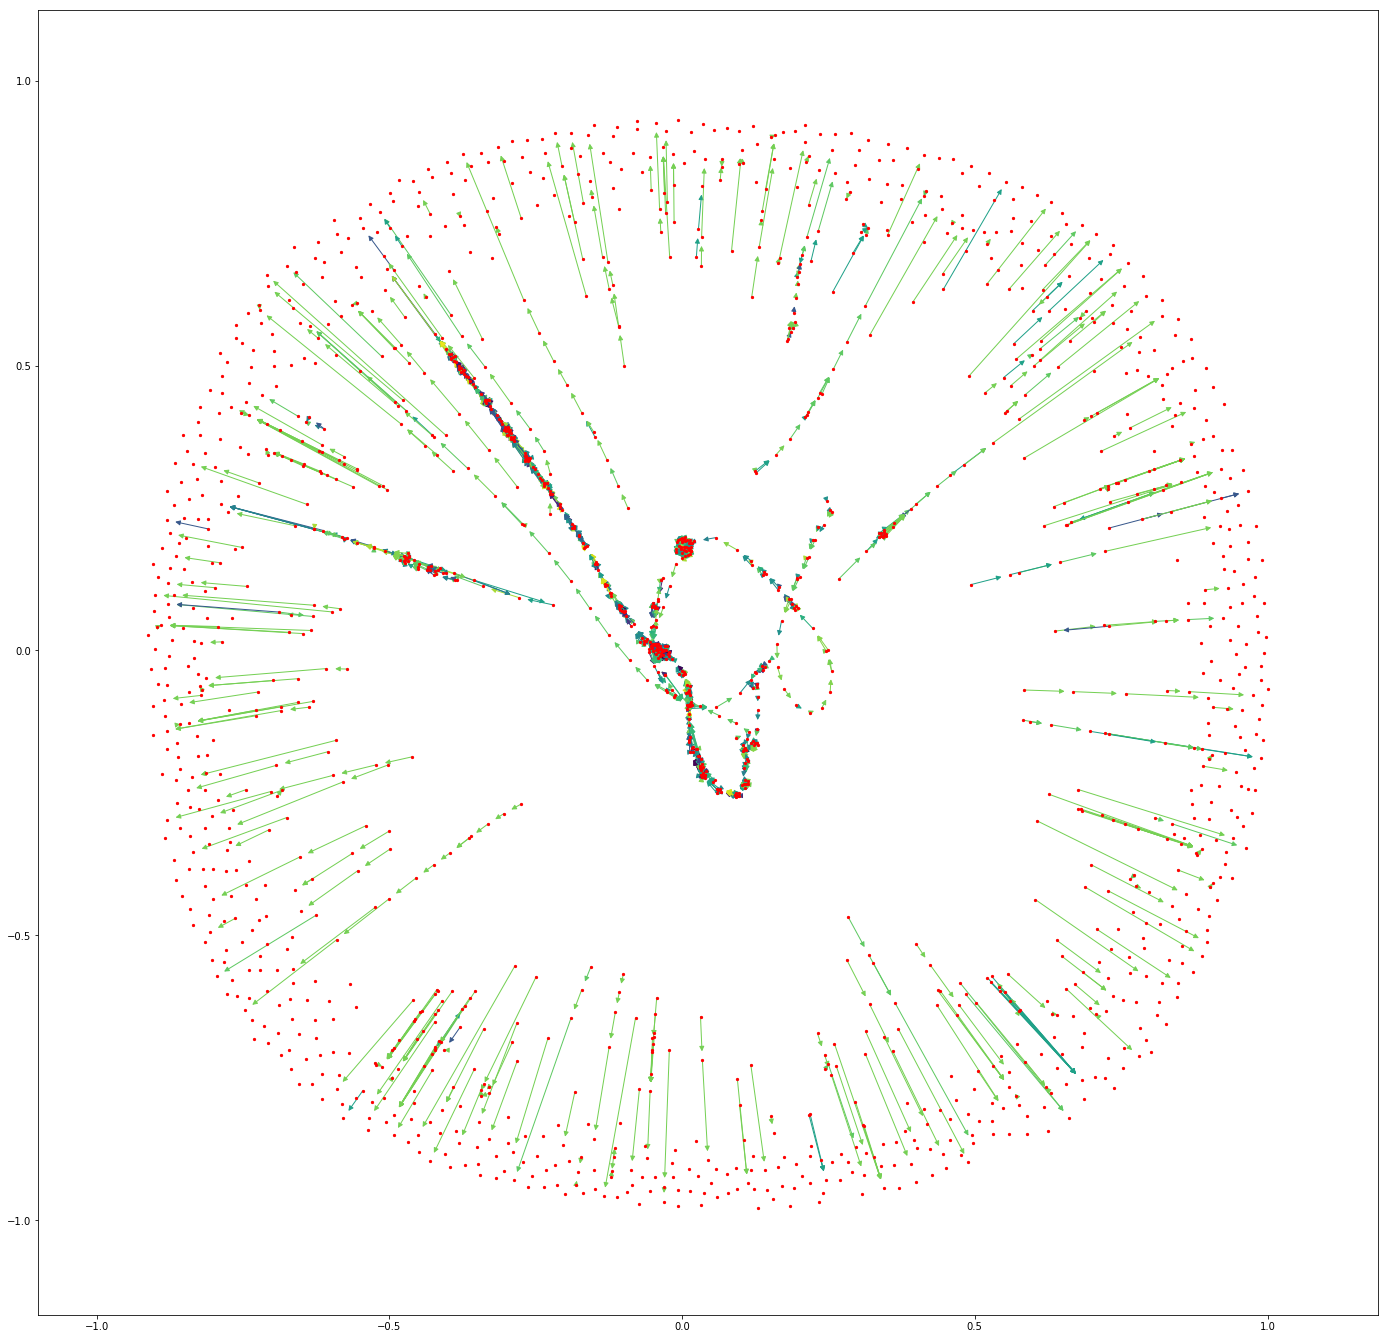

In [150]:
cases = set(nx.get_edge_attributes(arb_graph2,'case').values())
mapping = dict(zip(sorted(cases),count()))
edges = arb_graph2.edges()
colors = [mapping[arb_graph2.edges[n]['case']] for n in edges]

# drawing nodes and edges separately so we can capture collection for colobar
plt.figure(figsize=(24, 24))
pos = nx.spring_layout(arb_graph2)
ec = nx.draw_networkx_edges(arb_graph2, pos, edgelist=edges, edge_color=colors, edge_size=.1,cmap=plt.cm.terrain)
nc = nx.draw_networkx_nodes(arb_graph2, pos, node_size=5)#nodelist=nodes, node_color=colors, 
                            #with_labels=False, node_size=100, cmap=plt.cm.jet)

In [147]:
len(set(colors))

101

In [148]:
len(cases)

101

In [159]:
arb_big = arb_graph2.subgraph(max(nx.weakly_connected_components(arb_graph2), key=len))

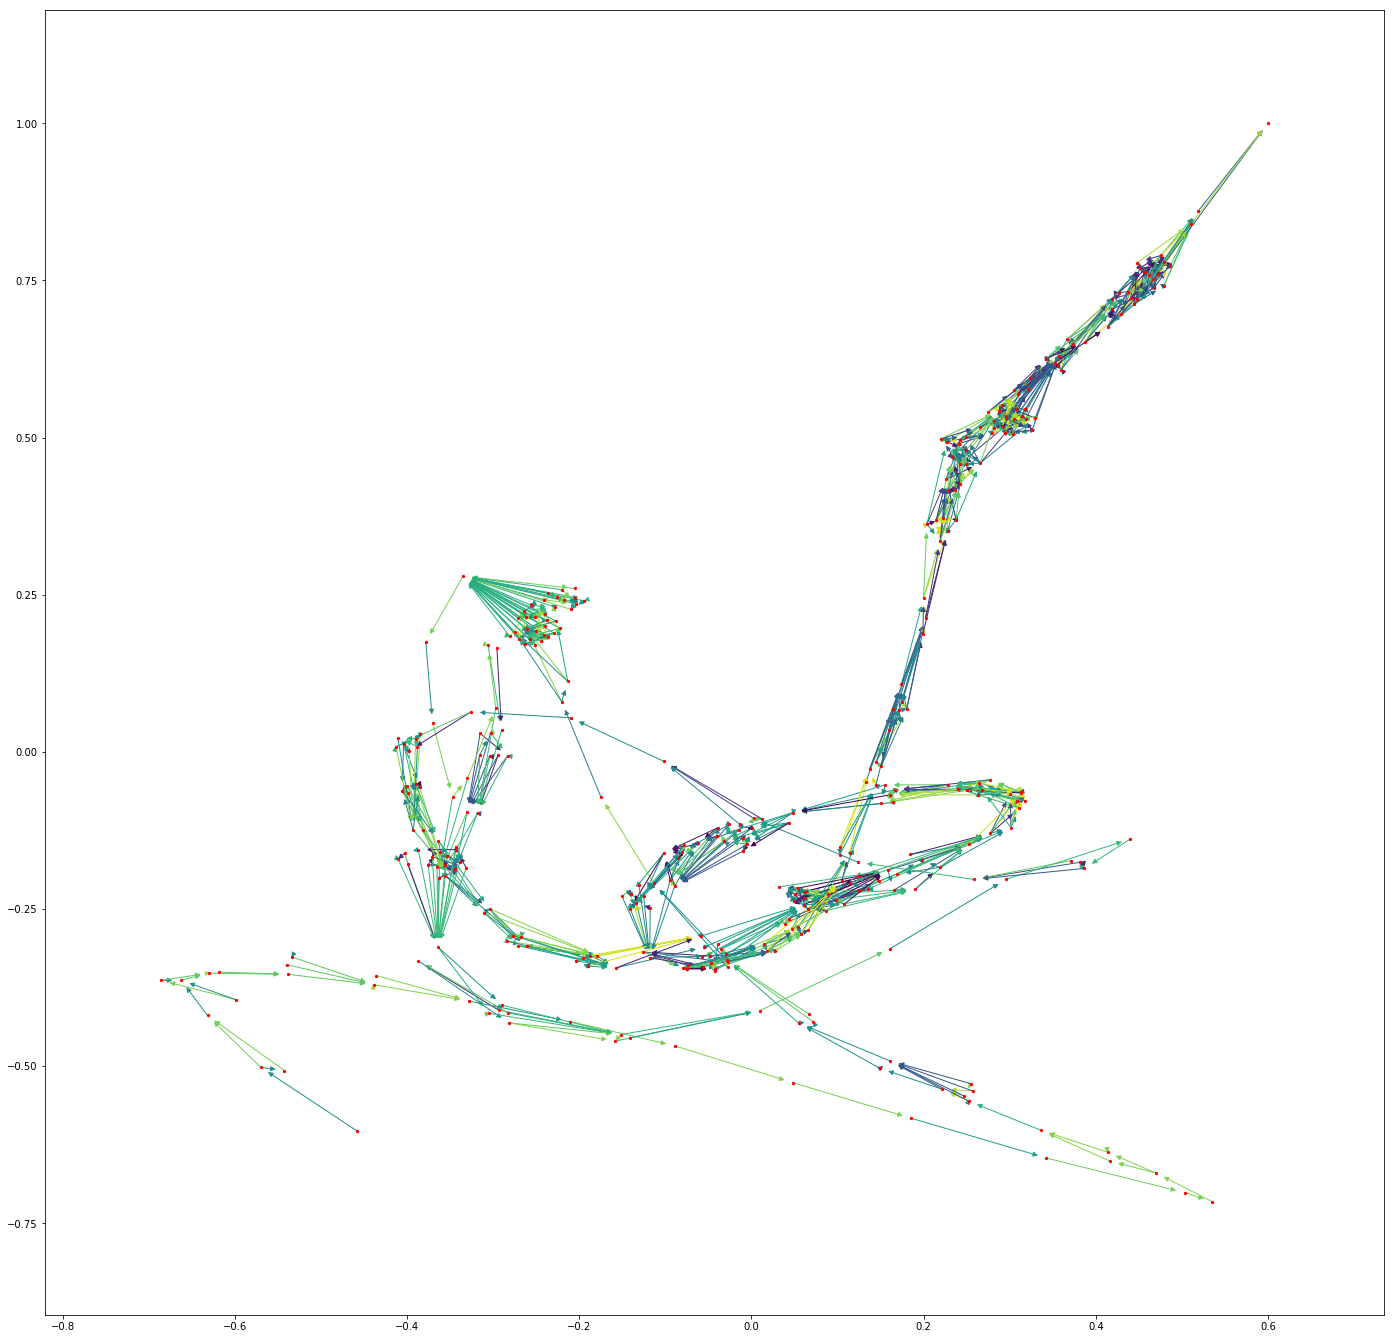

In [164]:
cases = set(nx.get_edge_attributes(arb_big,'case').values())
mapping = dict(zip(sorted(cases),count()))
edges = arb_big.edges()
colors = [mapping[arb_big.edges[n]['case']] for n in edges]

# drawing nodes and edges separately so we can capture collection for colobar
plt.figure(figsize=(24, 24))
pos = nx.fruchterman_reingold_layout(arb_big)
ec = nx.draw_networkx_edges(arb_big, pos, edgelist=edges, edge_color=colors, edge_size=.1,cmap=plt.cm.terrain)
nc = nx.draw_networkx_nodes(arb_big, pos, node_size=5)#nodelist=nodes, node_color=colors, 
                            #with_labels=False, node_size=100, cmap=plt.cm.jet)


In [158]:
len(arb_big)

350

In [166]:
len(arb_graphs)

341

In [172]:
os.path.splitext(os.listdir('watched_pages2')[0])[1]

'.graphml'

In [183]:
watched_graphs = []
for p in os.listdir('watched_pages2'):
    if os.path.splitext(p)[1] == '.graphml':
        path = os.path.join('watched_pages2', p)
        graph = nx.read_graphml(path)
        watched_graphs.append(graph)


In [179]:
len(watched_graphs)

282

In [184]:
watched_graph = nx.DiGraph()
for graph in watched_graphs:
    watched_graph = nx.compose(watched_graph, graph)

In [182]:
watched_graphs

[[<networkx.classes.digraph.DiGraph at 0x23266aef6a0>,

C:\Users\joe\Anaconda3\lib\site-packages\networkx\drawing\layout.py:499: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((delta**2).sum(axis=0))


MemoryError: 

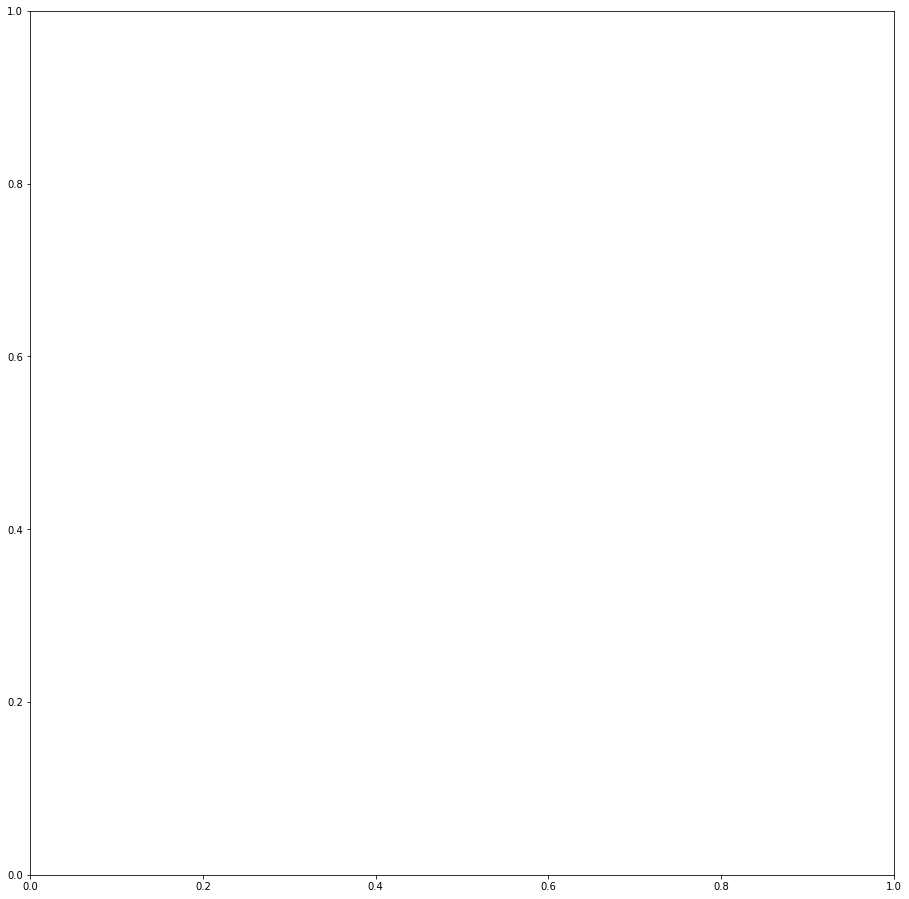

In [186]:
plt.figure(figsize=(12, 12))
nx.draw(watched_graph, node_size=5, edge_size=.1)#,pos=nx.spring_layout(arb_graph))

In [189]:
len(watched_graph.nodes)

48833

In [191]:
nx.write_graphml(watched_graph, 'watched_graph_prelim.gml')

In [9]:
an = nx.read_graphml('testy/idtalk/gml/id_network.graphml')

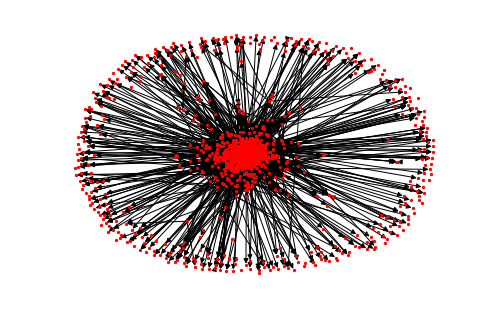

In [10]:
nx.draw(an, node_size=5, edge_size=.1,pos=nx.spring_layout(an))

In [14]:
arnud_ccdf = pd.read_csv('ANUd_dd_ccdf.csv')#, delim_whitespace=True)

In [15]:
arnud_ccdf

,Unnamed: 0,x,y
0,1,1,0.477248
1,2,1,0.477248
2,3,1,0.477248
3,4,1,0.477248
4,5,1,0.477248
5,6,1,0.477248
6,7,1,0.477248
7,8,1,0.477248
8,9,1,0.477248
9,10,1,0.477248


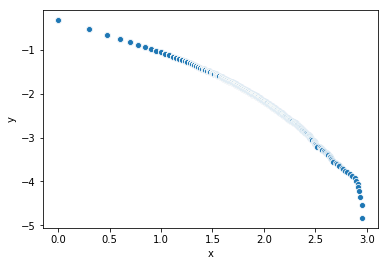

In [20]:
sns.scatterplot(np.log10(arnud_ccdf['x']),np.log10(arnud_ccdf['y']))

In [78]:
np.log10(0)

C:\Users\joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

C:\Users\joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


False

In [73]:
lreg = sp.stats.linregress(x=np.log10(arnud_ccdf['x']), y=np.log10(arnud_ccdf['y']))

C:\Users\joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
C:\Users\joe\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3103: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\joe\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\joe\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\joe\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [74]:
lreg

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [28]:
hg = nx.read_graphml('watched_pages2/Rubeus_Hagrid.comment_network.graphml')

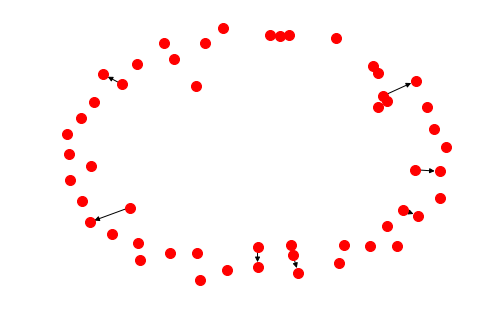

In [34]:
nx.draw(hg, node_size=100, edge_size=.1,pos=nx.spring_layout(hg))

In [35]:
homophily_df = pd.read_csv('homophily_data.csv')#, delim_whitespace=True)

In [58]:
homophily_df['group'] = homophily_df['degree']//20

In [67]:
def make_label(group):
    return "%d - %d" % (group*20, (group+1)*20)

homophily_df['label'] = [make_label(group) for group in homophily_df['group']]

In [68]:
homophily_df

,Unnamed: 0,degree,neighbors,group,label
0,1,7,165,0,0 - 20
1,2,7,98,0,0 - 20
2,3,7,312,0,0 - 20
3,4,7,263,0,0 - 20
4,5,7,829,0,0 - 20
5,6,7,3,0,0 - 20
6,7,7,4,0,0 - 20
7,8,7,53,0,0 - 20
8,9,7,51,0,0 - 20
9,10,7,6,0,0 - 20


Text(0.5,0,'Degree')

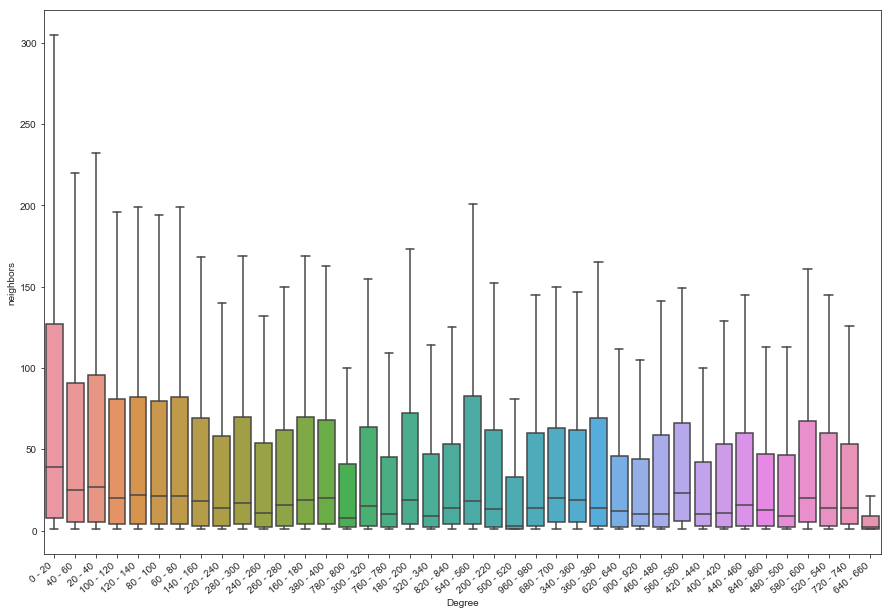

In [72]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)
sns.boxplot(x="label", y="neighbors",data=homophily_df, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Degree')

Text(0.5,1,'Degree Distributions of Neighborhoods')

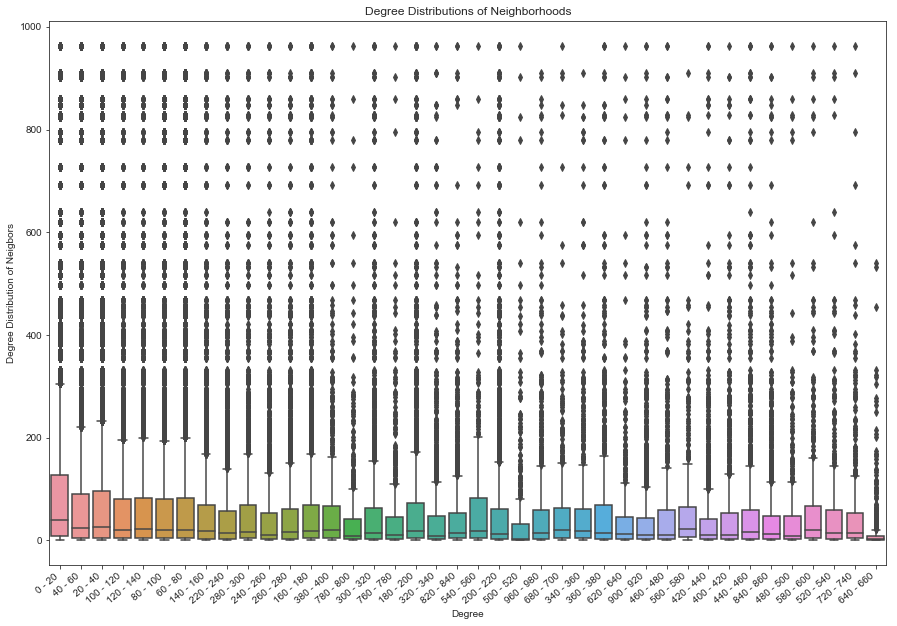

In [167]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)
sns.boxplot(x="label", y="neighbors",data=homophily_df)#, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Degree')
ax.set_ylabel('Degree Distribution of Neigbors')
ax.set_title('Degree Distributions of Neighborhoods')

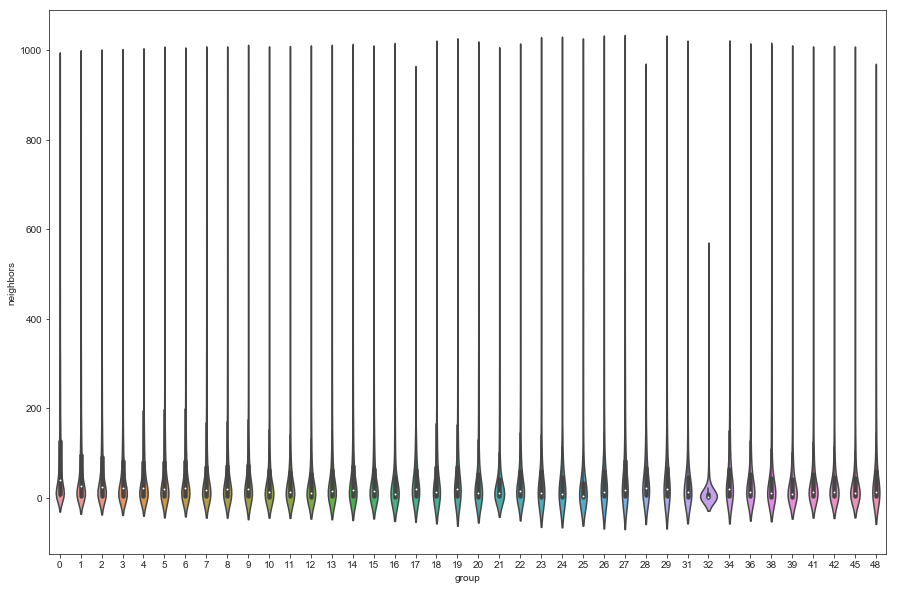

In [61]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)
sns.violinplot(x="group", y="neighbors",data=homophily_df)
#ax.set_yscale('log')

In [88]:
deg_df = pd.read_csv('raw_deg.csv')

Text(0.5,1,'Histogram of Degree Distribution ($\\log_{10}$ scale)')

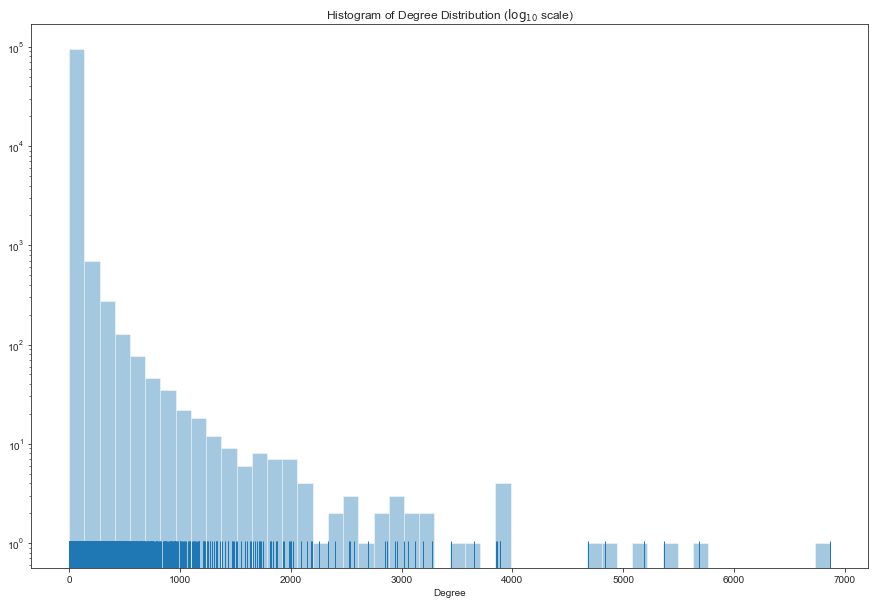

In [101]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)
sns.distplot(deg_df['degree.wg.'], kde=False, rug=True)
ax.set_xlabel('Degree')
ax.set_yscale('log')
ax.set_title('Histogram of Degree Distribution ($\log_{10}$ scale)')

Text(0.5,1,'Histogram of Degree Distribution ($\\log_{10}$ scale)')

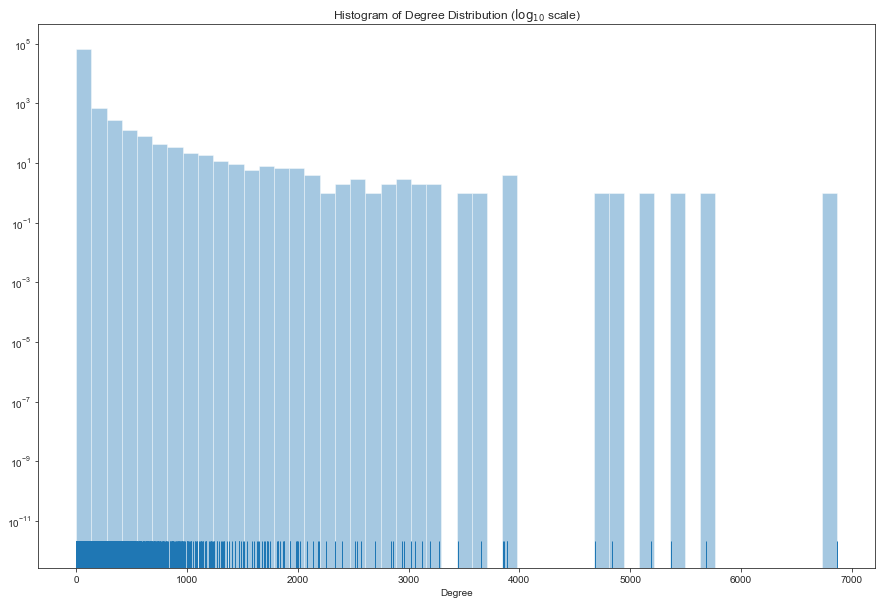

In [106]:
bc_deg_df = pd.read_csv('bigcomp_deg.csv')
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)
sns.distplot(bc_deg_df['degree.bigcomp.'], kde=False, rug=True)
ax.set_xlabel('Degree')
ax.set_yscale('log')
ax.set_title('Histogram of Degree Distribution ($\log_{10}$ scale)')

In [103]:
bc_deg_df

,Unnamed: 0,degree.bigcomp.
0,1,13
1,2,2
2,3,77
3,4,2
4,5,18
5,6,2
6,7,47
7,8,2
8,9,49
9,10,149


In [129]:
total = sum(deg_df['degree.wg.'])
deg_df['deg_prob'] = deg_df['degree.wg.']/total
mg_ac_ds = np.sort(deg_df['deg_prob'])
mg_ac_cdf = np.cumsum(mg_ac_ds)
mg_ac_ccdf = 1-mg_ac_cdf

C:\Users\joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


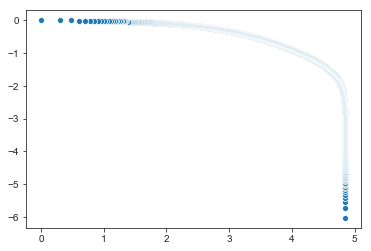

In [150]:
sns.scatterplot(y=np.log10(mg_ac_cdf), x=np.log10([len(mg_ac_cdf)+1-i for i in range(1,len(mg_ac_cdf)+1)]))

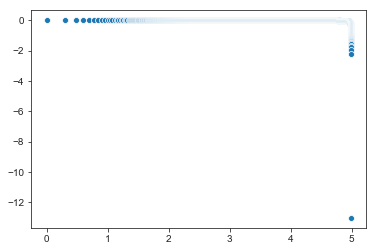

In [144]:
sns.scatterplot(y=np.log10(mg_ac_ccdf), x=np.log10([i for i in range(1,len(mg_ac_cdf)+1)]))

In [141]:
mg_ac_ds = np.sort(deg_df['degree.wg.'])
np.log10(mg_ac_ds)

C:\Users\joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


array([      -inf,       -inf,       -inf, ..., 3.72956973, 3.75442479,
       3.83676705])

In [151]:
degs = deg_df['degree.wg.']

C:\Users\joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


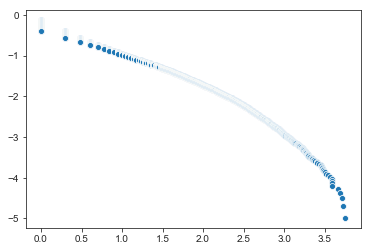

In [164]:
sorted_data = np.sort(degs)

yvals=1-np.arange(len(sorted_data))/float(len(sorted_data)-1)
sns.scatterplot(np.log10(sorted_data),np.log10(yvals), markers={'edgecolors':'none'})
#plt.show()